# Results - visualization

This notebook provides a set of graphs for visualizing the main experimental results for the linear classification of structured data for $k=2$, i.e couple of point with fixed overlap. Take a look at the other notebook for a deeper comparison with theoretical results.

In [1]:
import numpy as np
from scipy.optimize import curve_fit, brentq
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

## Generation of random couples

A visual way to confirm that the random generator is able to create uniformly distributed random couples on a sphere of radius $r=1$. 

In [2]:
def rand_couples(N: int, P: int, rho: float, seed: int=None):

    """
        Random doublets generator. 
        Generate P doublets (N-dimensional vectors) with fixed overlap rho.
    """

    np.random.seed(seed)

    xi = np.concatenate((np.zeros(N-1), 1), axis=None)
    xibar = np.array([])

    for mu in range(P):
        bar = np.random.randn(N-1)
        bar = np.concatenate(((bar/np.linalg.norm(bar)) * np.sqrt(1. - rho**2), rho), axis=None)

        randmat = np.random.randn(N,N)
        Q, R = np.linalg.qr(randmat)
        Q *= np.random.choice([-1,1])

        if mu == 0:
            xibar = np.array([Q@xi, Q@bar])
        else:
            xibar = np.vstack((xibar, Q@xi, Q@bar))

    return xibar

In [3]:
N, rho, seed = 3, 0.25, 123
P = 5000

v = rand_couples(N, P, rho, seed)
xi, xibar = np.array(v[0]), np.array(v[1])

for i in range(2, 2*P, 2):
    xi = np.vstack((xi, v[i]))
    xibar = np.vstack((xibar, v[i+1]))
    
doublets = np.vstack((xi,xibar))

x = doublets[:,0]
y = doublets[:,1]
z = doublets[:,2]

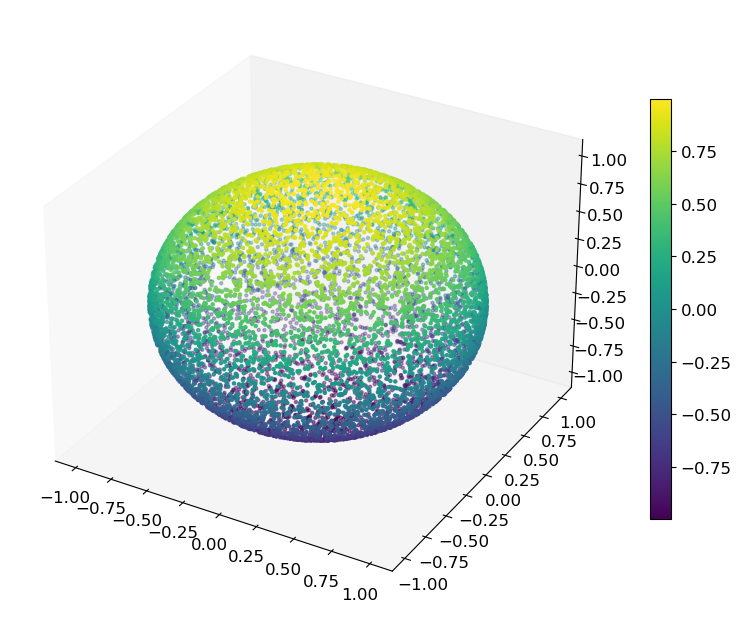

In [4]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
scc = ax.scatter(x, y, z, marker='.',cmap='viridis',c=z)
fig.colorbar(scc,shrink=0.7)
# ax.view_init(20, 30)
ax.grid(False)

## Simulation results

A set of results for different values of $N$. A comparison between *Gradient Descent* and *Root Finding* methods is displayed for fixed overlap $\rho$.

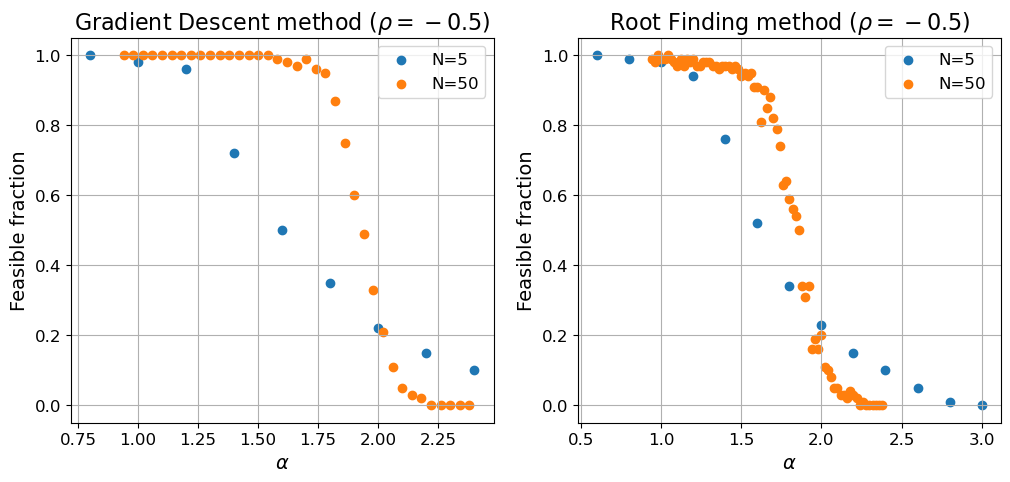

In [5]:
P_5_05, r_5_05 = np.loadtxt('../results/GD_5_-05.dat', dtype=float, unpack=True)
P_50_05, r_50_05  = np.loadtxt('../results/GD_50_-05.dat', dtype=float, unpack=True)
P_5_05_rf, r_5_05_rf = np.loadtxt('../results/RF_5_-05.dat', dtype=float, unpack=True)
P_50_05_rf, r_50_05_rf  = np.loadtxt('../results/RF_50_-05.dat', dtype=float, unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(P_5_05/5, r_5_05, label='N=5')
ax[0].scatter(P_50_05/50, r_50_05, label='N=50')
ax[0].set_title(r'Gradient Descent method ($\rho = -0.5$)')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'Feasible fraction')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(P_5_05_rf/5, r_5_05_rf, label='N=5')
ax[1].scatter(P_50_05_rf/50, r_50_05_rf, label='N=50')
ax[1].set_title(r'Root Finding method ($\rho = -0.5$)')
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'Feasible fraction')
ax[1].grid(True)
ax[1].legend()
plt.show()

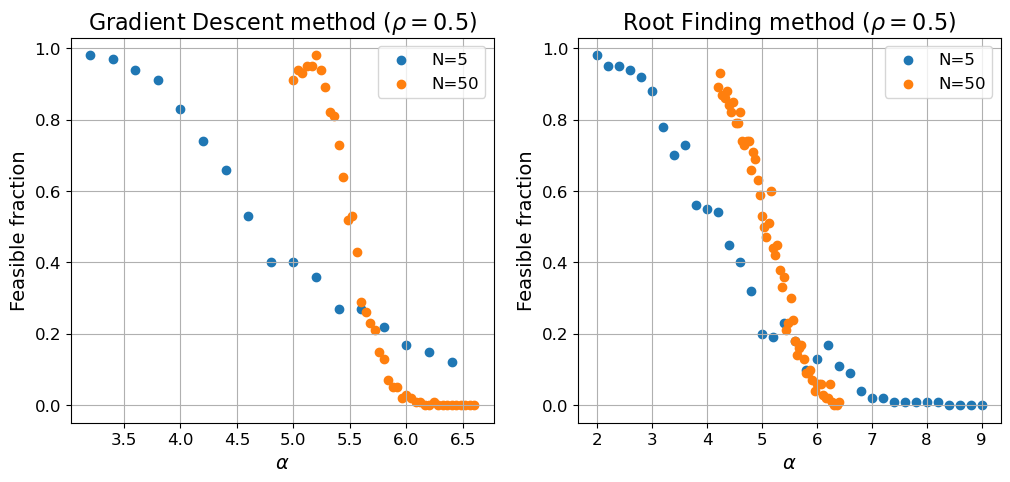

In [6]:
P_5_05, r_5_05 = np.loadtxt('../results/GD_5_05.dat', dtype=float, unpack=True)
P_50_05, r_50_05  = np.loadtxt('../results/GD_50_05.dat', dtype=float, unpack=True)
P_5_05_rf, r_5_05_rf = np.loadtxt('../results/RF_5_05.dat', dtype=float, unpack=True)
P_50_05_rf, r_50_05_rf  = np.loadtxt('../results/RF_50_05.dat', dtype=float, unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(P_5_05/5, r_5_05, label='N=5')
ax[0].scatter(P_50_05/50, r_50_05, label='N=50')
ax[0].set_title(r'Gradient Descent method ($\rho = 0.5$)')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'Feasible fraction')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(P_5_05_rf/5, r_5_05_rf, label='N=5')
ax[1].scatter(P_50_05_rf/50, r_50_05_rf, label='N=50')
ax[1].set_title(r'Root Finding method ($\rho = 0.5$)')
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'Feasible fraction')
ax[1].grid(True)
ax[1].legend()
plt.show()

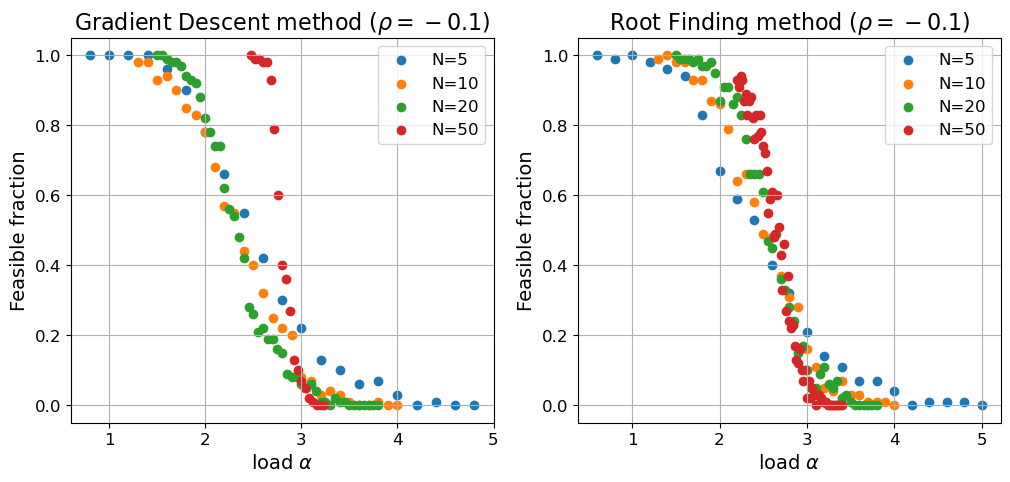

In [7]:
P_5_01, r_5_01  = np.loadtxt('../results/GD_5_-01.dat', dtype=float, unpack=True)
P_10_01, r_10_01  = np.loadtxt('../results/GD_10_-01.dat', dtype=float, unpack=True)
P_20_01, r_20_01 = np.loadtxt('../results/GD_20_-01.dat', dtype=float, unpack=True)
P_50_01, r_50_01 = np.loadtxt('../results/GD_50_-01.dat', dtype=float, unpack=True)

P_5_01_rf, r_5_01_rf  = np.loadtxt('../results/RF_5_-01.dat', dtype=float, unpack=True)
P_10_01_rf, r_10_01_rf  = np.loadtxt('../results/RF_10_-01.dat', dtype=float, unpack=True)
P_20_01_rf, r_20_01_rf = np.loadtxt('../results/RF_20_-01.dat', dtype=float, unpack=True)
P_50_01_rf, r_50_01_rf = np.loadtxt('../results/RF_50_-01.dat', dtype=float, unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(P_5_01/5, r_5_01, label='N=5')
ax[0].scatter(P_10_01/10, r_10_01, label='N=10')
ax[0].scatter(P_20_01/20, r_20_01, label='N=20')
ax[0].scatter(P_50_01/50, r_50_01, label='N=50')
ax[0].set_title(r'Gradient Descent method ($\rho = -0.1$)')
ax[0].set_xlabel(r'load $\alpha$')
ax[0].set_ylabel(r'Feasible fraction')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(P_5_01_rf/5, r_5_01_rf, label='N=5')
ax[1].scatter(P_10_01_rf/10, r_10_01_rf, label='N=10')
ax[1].scatter(P_20_01_rf/20, r_20_01_rf, label='N=20')
ax[1].scatter(P_50_01_rf/50, r_50_01_rf, label='N=50')
ax[1].set_title(r'Root Finding method ($\rho = -0.1$)')
ax[1].set_xlabel(r'load $\alpha$')
ax[1].set_ylabel(r'Feasible fraction')
ax[1].grid(True)
ax[1].legend()
plt.show()

## Loss comparison for SAT-UNSAT phase

A simple comparison for the loss values between the SAT and UNSAT phase at varying epochs. The results are presented for fixed dimension $N$ and overlap $\rho$.

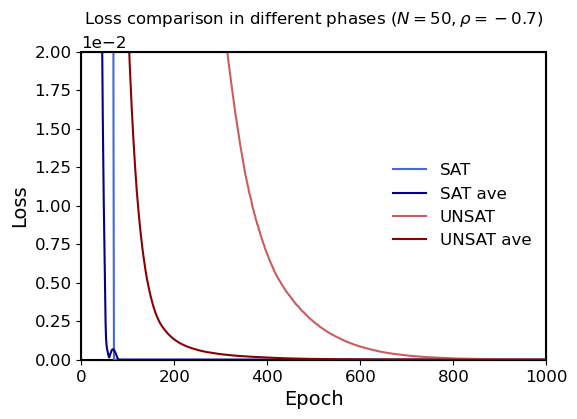

In [8]:
loss_sat = np.loadtxt("../results/loss_sat.dat", dtype=float)
loss_satave = np.loadtxt("../results/loss_satave.dat", dtype=float)
loss_unsat = np.loadtxt("../results/loss_unsat.dat", dtype=float)
loss_unsatave = np.loadtxt("../results/loss_unsatave.dat", dtype=float)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(list(range(len(loss_sat))), loss_sat, label="SAT", c='royalblue')
ax.plot(list(range(len(loss_satave))), loss_satave, label="SAT ave", c='darkblue')
ax.plot(list(range(len(loss_unsat))), loss_unsat, label="UNSAT", c='indianred')
ax.plot(list(range(len(loss_unsatave))), loss_unsatave, label="UNSAT ave", c='darkred')
ax.set_xlim([0,1000])
ax.set_ylim([0,0.02])
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))
ax.set_title(r"Loss comparison in different phases ($ N = 50, \rho = -0.7$)", pad=20, size=12)
ax.set_xlabel("Epoch")
ax.set_ylabel(r"Loss")
ax.legend(loc='center right', framealpha=0.)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5')  

## Logistic fit and transition point

We report some examples of the method used to compute the transition point $\alpha_*$ for the experimental simulations. The mail idea consists in approximating the exmperimental curves with the "fraction of realizations" using a logistic funtion $L_g$ and determining the transition point as $L_g (\alpha_*) = 0.5$

In [9]:
# Fit with logitic function
def logistic_fixed(x, x0, k):
    
    return 1./(1 + np.exp(-k*(x-x0)))


def linear(x, a, b):
    
    return a*x + b


def interpolate_logistic_fixed(curve, lin=None):
    
    """Fit the list of point with a logisic function and return where the fitted curves is 0.5"""
    
    if lin is None:
        popt, pcov = curve_fit(logistic_fixed, curve[0], curve[1], maxfev=10000, method='trf')
        
        fn = lambda x: logistic_fixed(x, *popt) - 0.5
    else:
        first = np.argmax(curve[1] < 0.9) # first point where it's less
        last = np.argmax(curve[1] < 0.1)  # first point where it's less
        
        popt, pcov = curve_fit(linear, curve[0][first:last], curve[1][first:last], maxfev=10000, method='lm')
        
        fn = lambda x: linear(x, *popt) - 0.5

    x_int = brentq(fn, curve[0][0], curve[0][-1])

    
    return x_int

def interpolate_logistic_fixed_value_error(curve, value, lin=None):
    
    """Fit the list of point with a logisic function and return where the fitted curves is 'value'"""
    
    if lin is None:
        popt, pcov = curve_fit(logistic_fixed, curve[0], curve[1], maxfev=10000, method='trf')
        perr = np.sqrt(np.diag(pcov))
        
        fn = lambda x: logistic_fixed(x, *popt) - value
    else:
        first = np.argmax(curve[1] < 0.9) # first point where it's less
        last = np.argmax(curve[1] < 0.1)  # first point where it's less
        
        popt, pcov = curve_fit(linear, curve[0][first:last], curve[1][first:last], maxfev=10000, method='lm')
        perr = np.sqrt(np.diag(pcov))
        
        fn = lambda x: linear(x, *popt) - value

    # Optimization result
    x_int = brentq(fn, curve[0][0], 20)

    
    return x_int, perr


def error_binomial(p, n):
    
    """Standard error for binomial distribution"""
    
    return np.sqrt(p*(1.-p)/n)
    

def make_errors(data, n=100):
    
    """Array of errors from binomial distribution"""

    return np.array([error_binomial(p, n) for p in data])

In [10]:
P_50, r_50 = np.loadtxt(f'../results/GD_50_03.dat', dtype=float, unpack=True)
alpha_50 = P_50/50.

tmp_error_50 = np.array([err if err != 0 else 10**(-3) for err in make_errors(r_50)])
popt, pcov = curve_fit(logistic_fixed, alpha_50, r_50, sigma=tmp_error_50, maxfev=10000, method='trf')
perr = np.sqrt(np.diag(pcov))

fn = lambda x: logistic_fixed(x, *popt) - 0.5

print("Optimized parameters:", *popt)
print("Optimization error:", perr)

Optimized parameters: 4.239463465735637 -13.127881169038512
Optimization error: [0.01323062 0.90267209]


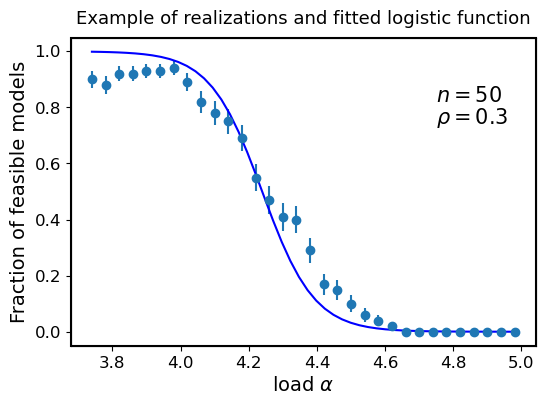

In [11]:
# Plot
x = np.linspace(alpha_50[0], alpha_50[-1], 50)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.errorbar(alpha_50, r_50, yerr=make_errors(r_50), fmt="o", ms=6)
ax.plot(x, logistic_fixed(x,*popt), color='blue')
ax.annotate(r'$n=50$', (4.75, 0.82), textcoords='data', size=15)
ax.annotate(r'$\rho = 0.3$', (4.75, 0.74), textcoords='data', size=15)
ax.set_title('Example of realizations and fitted logistic function', size=13, pad=10)
ax.set_xlabel(r'load $\alpha$')
ax.set_ylabel(r'Fraction of feasible models')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5')

In [12]:
P_5_01, r_5_01 = np.loadtxt('../results/GD_5_-01.dat', dtype=float, unpack=True)
P_50_01, r_50_01 = np.loadtxt('../results/GD_50_-01.dat', dtype=float, unpack=True)

alpha_5_01 = P_5_01/5.
alpha_50_01 = P_50_01/50.

tmp_error_5_01  = np.array([err if err != 0 else 10**(-3) for err in make_errors(r_5_01)])
tmp_error_50_01 = np.array([err if err != 0 else 10**(-3) for err in make_errors(r_50_01)])

popt_5_01, pcov_5_01 = curve_fit(
    logistic_fixed,
    alpha_5_01,
    r_5_01,
    sigma=tmp_error_5_01,
    maxfev=10000,
    method='trf'
)

popt_50_01, pcov_50_01 = curve_fit(
    logistic_fixed,
    alpha_50_01,
    r_50_01,
    sigma=tmp_error_50_01,
    maxfev=10000,
    method='trf'
)

print("Fitted parameters for N=5:", *popt_5_01)
print("Fitted parameters for N=50:", *popt_50_01)

Fitted parameters for N=5: 2.557046031549235 -4.832633119649757
Fitted parameters for N=50: 2.8043155735988154 -19.142365792543355


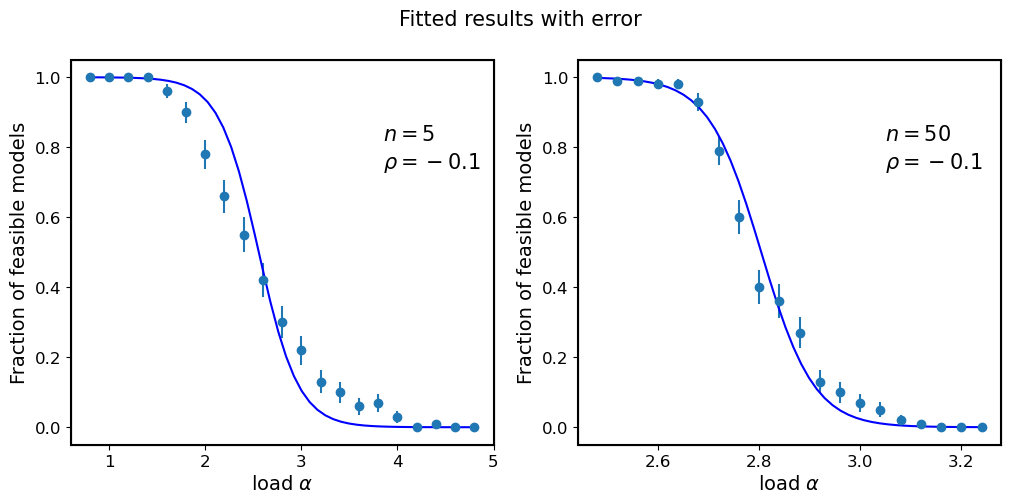

In [13]:
# Plot
x_5_01 = np.linspace(alpha_5_01[0], alpha_5_01[-1], 50)
x_50_01 = np.linspace(alpha_50_01[0], alpha_50_01[-1], 50)

fig, ax = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("Fitted results with error",size=15)
ax[0].errorbar(alpha_5_01, r_5_01, yerr=make_errors(r_5_01), fmt="o", ms=6)
ax[0].plot(x_5_01, logistic_fixed(x_5_01, *popt_5_01), color='blue')
ax[0].annotate(r'$n=5$', (3.85, 0.82), textcoords='data', size=15)
ax[0].annotate(r'$\rho = -0.1$', (3.85, 0.74), textcoords='data', size=15)
ax[0].set_xlabel(r'load $\alpha$')
ax[0].set_ylabel(r'Fraction of feasible models')
ax[0].patch.set_edgecolor('black')  
ax[0].patch.set_linewidth('1.5')

ax[1].errorbar(alpha_50_01, r_50_01, yerr=make_errors(r_50_01), fmt="o", ms=6)
ax[1].plot(x_50_01, logistic_fixed(x_50_01, *popt_50_01), color='blue')
ax[1].annotate(r'$n=50$', (3.05, 0.82), textcoords='data', size=15)
ax[1].annotate(r'$\rho = -0.1$', (3.05, 0.74), textcoords='data', size=15)
ax[1].set_xlabel(r'load $\alpha$')
ax[1].set_ylabel(r'Fraction of feasible models')
ax[1].patch.set_edgecolor('black')  
ax[1].patch.set_linewidth('1.5')

## Transition point versus overlap

Here we report the main result of this study, i.e. the relationship between the transition point $\alpha_*$ an the overlap $\rho$.

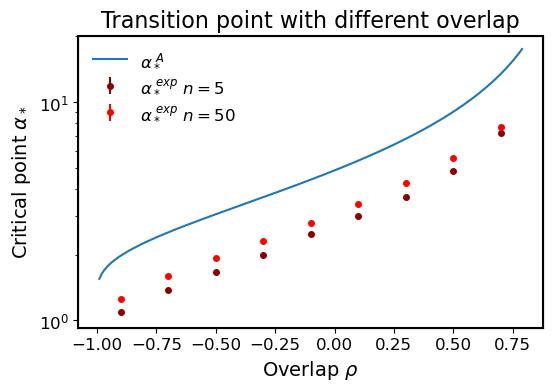

In [14]:
r, values = np.loadtxt('../results/table_alpha.dat', dtype=float, unpack=True)
tmp_list = [f'-0{n}' for n in range(9,0,-2)] + [f'0{n}' for n in range(1,9,2)]

rhos = np.arange(-0.9, 0.9, 0.2, dtype=float)
astar_5, astar_50 = [], []
error_5, error_50 = [], []
shift_val = 0.5
lin = None

# Make fit and save results
for rho_string in tmp_list:
    if rho_string in ("07","08","09"):
        lin = "yes"
    else:
        lin = None
        
    P_5, r_5 = np.loadtxt(f'../results/GD_5_{rho_string}.dat', dtype=float, unpack=True)
    P_50, r_50 = np.loadtxt(f'../results/GD_50_{rho_string}.dat', dtype=float, unpack=True)
    
    alpha_5 = P_5/5.
    alpha_50 = P_50/50.
    
    x_int_5, perr_5 = interpolate_logistic_fixed_value_error((alpha_5, r_5), shift_val, lin)
    x_int_50, perr_50 = interpolate_logistic_fixed_value_error((alpha_50, r_50), shift_val, lin)
    
    astar_5.append(x_int_5)
    astar_50.append(x_int_50)
    
    error_5.append(perr_5[0])
    error_50.append(perr_50[0])

# Plot
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(r[:-20], values[:-20], label=r'$\alpha_*^{\,\,A}$')
ax.errorbar(rhos, astar_5, yerr=error_5, fmt="o", ms=4, label=r'$\alpha_*^{\,\,exp}$ $n=5$', c='darkred')
ax.errorbar(rhos, astar_50, yerr=error_50, fmt="o", ms=4, label=r'$\alpha_*^{\,\,exp}$ $n=50$', c='red')
ax.set_title(r'Transition point with different overlap')
ax.set_xlabel(r'Overlap $\rho$')
ax.set_ylabel(r'Critical point $\alpha_*$')
ax.set_yscale('log')
ax.legend(loc='best', framealpha=0.)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5')  
plt.gcf().subplots_adjust(bottom=0.15)

##  Size correction for finite $N$ and scaling functions

The problem of linear classification of structure data presents finite-size effects, i.e. the behaviour of the transition can change if the size of the sistem is finite. We use the theory of *finite-size scaling* to gain some insigths on the SAT-UNSAT transition.

In [15]:
def f_scaling(N, a, gamma, astar):
    
    """Template 1. Scaling function for size correction for finite N"""
    
    
    return astar*(1. - a/N**gamma)

def g_scaling(N, a, b, astar):
    
    """Template 2. Scaling function for size correction for finite N"""
    
    
    return astar*(1. + a/N + b/(N**2))

In [16]:
poli_N, poli_alpha = np.loadtxt("../results/alpha_finite_size_-06.dat", dtype=float, unpack=True)

# Run optimization for both scaling functions (theory)
popt_f_th, pcov_f_th = curve_fit(f_scaling, poli_N, poli_alpha, maxfev=10000, method='lm')
popt_g_th, pcov_g_th = curve_fit(g_scaling, poli_N, poli_alpha, maxfev=10000, method='lm')

print("Fitted parameters for fss function f(N) (theory):", popt_f_th)
print("Fitted parameters for fss function g(N) (theory):", popt_g_th)

# Run optimization for both scaling functions (simulations)
list_N = list(range(5,51,5))
files = [f'../results/GD_{n}_-06.dat' for n in list_N]
list_alpha, list_r = [], []

for file, NN in zip(files, list_N):
    tmp_P, tmp_r = np.loadtxt(file, dtype=float, unpack=True)
    
    tmp_P /= float(NN)
    
    list_alpha.append(tmp_P)
    list_r.append(tmp_r)
    
# Run fit and save results in list
alpha_star_scaling = [interpolate_logistic_fixed((a,r)) for a, r in zip(list_alpha, list_r)]

popt_f_exp, pcov_f_exp = curve_fit(f_scaling, list_N, alpha_star_scaling, maxfev=10000, method='lm')
popt_g_exp, pcov_g_exp = curve_fit(g_scaling, list_N, alpha_star_scaling, maxfev=10000, method='lm')

print("Fitted parameters for fss function f(N) (experimental):", popt_f_exp)
print("Fitted parameters for fss function g(N) (experimental):", popt_g_exp)

Fitted parameters for fss function f(N) (theory): [0.18236732 0.97270684 2.79356677]
Fitted parameters for fss function g(N) (theory): [-0.19584658  0.03062288  2.79309711]
Fitted parameters for fss function f(N) (experimental): [0.4127809  0.4222688  1.91958329]
Fitted parameters for fss function g(N) (experimental): [-1.45411811  3.22795105  1.81555259]


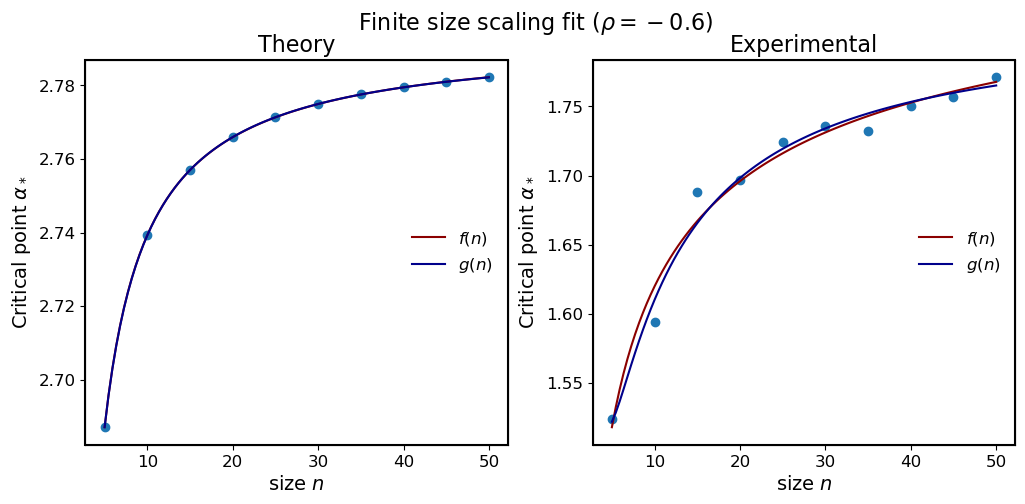

In [17]:
# Plot results
x_N = np.linspace(5,50,100)

fig, ax = plt.subplots(1,2,figsize=(12,5))
fig.suptitle(r"Finite size scaling fit ($\rho = -0.6$)", size=16)
ax[0].scatter(poli_N, poli_alpha)
ax[0].plot(x_N, f_scaling(x_N, *popt_f_th), c='darkred', label=r'$f(n)$')
ax[0].plot(x_N, g_scaling(x_N, *popt_g_th), c='darkblue', label=r'$g(n)$')
ax[0].set_title("Theory")
ax[0].set_xlabel(r'size $n$')
ax[0].set_ylabel(r'Critical point $\alpha_*$')
ax[0].legend(loc='center right', framealpha=0.)
ax[0].patch.set_edgecolor('black')  
ax[0].patch.set_linewidth('1.5')  

ax[1].scatter(list_N, alpha_star_scaling)
ax[1].plot(x_N, f_scaling(x_N, *popt_f_exp), c='darkred', label=r'$f(n)$')
ax[1].plot(x_N, g_scaling(x_N, *popt_g_exp), c='darkblue', label=r'$g(n)$')
ax[1].set_title("Experimental")
ax[1].set_xlabel(r'size $n$')
ax[1].set_ylabel(r'Critical point $\alpha_*$')
ax[1].legend(loc='center right', framealpha=0.)
ax[1].patch.set_edgecolor('black')  
ax[1].patch.set_linewidth('1.5')  

## Empirical formula for the critical point

The transcendental equantion for the critical point $\alpha_*$ in the thermodynamic limit has no analytical solutions, but we propose a template fit to realize a very close approximation made of simple functions (and starting theoretical for of $\alpha_*^{AN}$ computed using the annealed approximation).

In [18]:
def alpha_annealed(rho):
    
    """Return the value of alpha_* using the annealed approximation"""
    
    return -(1. + np.log(2*np.pi)) / (2*np.log(0.5 + np.arcsin(rho)/np.pi))

def alpha_RS(rho):
    
    """Return the value of alpha_* using RS ansatz"""
    
    r = np.sqrt((1. - rho)/(1. + rho))
    q = np.sqrt(1. - rho**2)
    
    return np.pi/(2*np.arctan(r) - q)


# Prototypes
def linear_exp(x: float, a: float, b: float, c1: float, c2: float):
    
    return a*x + b + np.exp(c1*(x-c2))


def cubic_exp(x: float, a: float, b: float, c: float, d: float, c1: float, c2: float):
    
    return a*x**3 + b*x**2 + c*x + d + np.exp(c1*(x-c2))

In [19]:
r, values = np.loadtxt('../results/table_alpha.dat', dtype=float, unpack=True)
values_A = alpha_annealed(r)

diff = values - values_A
log_diff = np.log(diff)
last_rho = -1

# Run fit (linear)
popt_linear, pcov_linear = curve_fit(linear_exp, r[:last_rho], log_diff[:last_rho])
print("Optimization parameters (linear):")
print(*popt_linear)

# Run fit (cubic)
popt_cubic, pcov_cubic = curve_fit(cubic_exp, r[:last_rho], log_diff[:last_rho])
print("Optimization parameters (cubic):")
print(*popt_cubic)

Optimization parameters (linear):
0.9547901621135417 1.0553865686518096 5.453389906367837 0.8688808490673644
Optimization parameters (cubic):
0.374123619831076 0.4950151991901971 1.0473247378653363 1.0267200821497853 14.486074401323856 0.9694067133220361


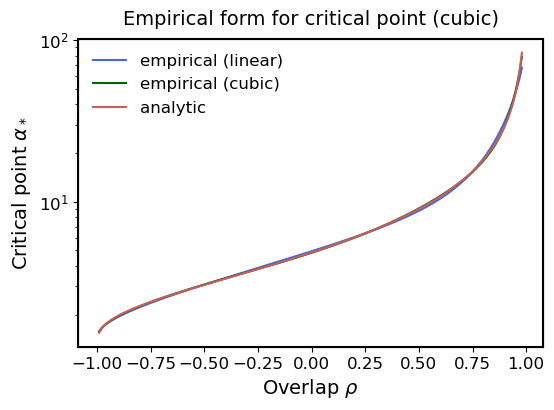

In [20]:
# Plot function with approximated values
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(r[:last_rho], np.exp(linear_exp(r[:last_rho], *popt_linear)) + values_A[:last_rho], linestyle='-', label='empirical (linear)', color='royalblue')
ax.plot(r[:last_rho], np.exp(cubic_exp(r[:last_rho], *popt_cubic)) + values_A[:last_rho], linestyle='-', label='empirical (cubic)', color='darkgreen')
ax.plot(r[:last_rho], values[:last_rho], label='analytic', color='indianred', linestyle='-')
ax.set_yscale("log")
ax.set_title(r"Empirical form for critical point (cubic)", pad=10, size=14)
ax.set_xlabel(r"Overlap $\rho$")
ax.set_ylabel(r"Critical point $\alpha_*$")
ax.legend(loc='best', framealpha=0.)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1.5')